In [79]:
import pandas as pd
import numpy as np
import plotnine as p9

Let's take the case of the 4 armed bandit.

True rewards are below and all will have variance 1. 

In [7]:
act_values = {1: -1, 2:2, 3:3, 4:0}

act_values[1]

-1

In [44]:
value_df = pd.DataFrame({"arm":[1,2,3,4], "value": [0,0,0,0]})

all_samples = value_df.copy()

all_samples

,arm,value
0,1,0
1,2,0
2,3,0
3,4,0


We will be using sample-average action-value estimates.

In [89]:
def pull_lever(value_df, all_samples, epsilon):
    
    greedy = np.random.random_sample() > epsilon

    if greedy:
#        print('greedy choice')
    
        choices = value_df.loc[np.where(value_df['value'] == max(value_df['value']))]['arm'].values
        
        if len(choices) > 1:
            pull_arm = np.random.choice(choices)
        else:
            pull_arm = choices[0]
    else:
#        print('exploratory choice')

        pull_arm = np.random.choice([1,2,3,4])
            
    new_value_pull = np.random.normal(act_values[pull_arm], 1, 1)
    
    new_row = pd.DataFrame({"arm": pull_arm, 'value': new_value_pull})
    
    all_samples = all_samples.append(new_row)
    
    value_df = all_samples.groupby("arm")['value'].mean().reset_index()
    
    av_value_pull = value_df.loc[value_df['arm'] == pull_arm]['value'].reset_index(drop = True)[0]
    
   # av_value_pull = value_df['value'].mean()
    
    return pull_arm, av_value_pull, value_df, all_samples 
    
# pull_arm, av_val, value_df, all_samples  = pull_lever(value_df, all_samples, .3)

# print(pull_arm)


def play_many_times():
    
    epsilon_list = np.arange(.5, 0, -0.001)
    
    n = len(epsilon_list)
    
    act_values = {1: -1, 2:2, 3:3, 4:0}
    
    value_df = pd.DataFrame({"arm":[1,2,3,4], "value": [0,0,0,0]})

    all_samples = value_df.copy()
    
    move_df = pd.DataFrame()
    
    for i in range(n):
        epsilon = epsilon_list[i]
        
        pull_arm, av_val, value_df, all_samples = pull_lever(value_df, all_samples, epsilon = epsilon)
                
        new_row = pd.DataFrame({"move": [i], "arm": [pull_arm], "av_value": [av_val]})
        
        move_df = move_df.append(new_row)

    return move_df

moves = play_many_times()
        

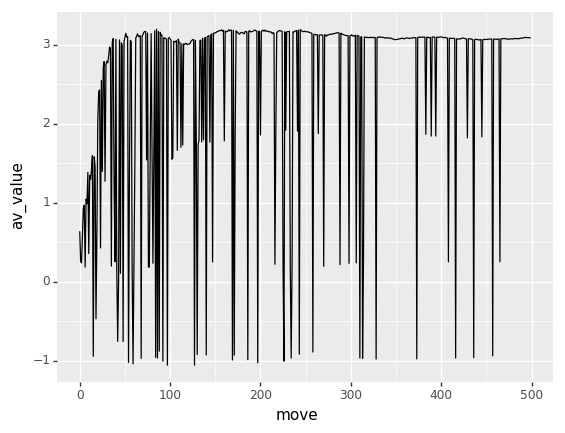

<ggplot: (7545702313)>

In [90]:
moves['max_value'] = 3
moves['perc_max'] = moves['av_value']/moves['max_value']

(p9.ggplot(moves, p9.aes(x = "move", y = "av_value")) + p9.geom_line())